In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from loadTDMS import load_tdms

In [21]:
path = r'C:\Users\pmg07\Desktop\2021_1115_切削実験\ae\AE_368.tdms'
d = load_tdms(path, ch_num=3)

In [24]:
def data_split(t, x, split_t_r, overlap):

    split_data = []
    one_frame_N = int(len(t)*split_t_r)  # 1フレームのサンプル数
    overlap_N = int(one_frame_N*overlap)  # オーバーラップするサンプル数
    start_S = 0
    end_S = start_S + one_frame_N

    while True:
        t_cont = t[start_S:end_S]
        x_cont = x[start_S:end_S]
        split_data.append([t_cont, x_cont])

        start_S = start_S + (one_frame_N - overlap_N)
        end_S = start_S + one_frame_N

        if end_S > len(t):
            break

    return np.array(split_data)

In [25]:
def FFT_main(t, x, dt, split_t_r, overlap, window_F, output_FN, y_label, y_unit):

    # データをオーバーラップして分割する。
    split_data = data_split(t, x, split_t_r, overlap)

    # FFTを行う。
    FFT_result_list = []
    for split_data_cont in split_data:
        FFT_result_cont = FFT(split_data_cont, dt, window_F)
        FFT_result_list.append(FFT_result_cont)

    # 平均化
    fq_ave = FFT_result_list[0][0]
    F_abs_amp_ave = np.zeros(len(fq_ave))
    for i in range(len(FFT_result_list)):
        F_abs_amp_ave = F_abs_amp_ave + FFT_result_list[i][1]
    F_abs_amp_ave = F_abs_amp_ave/(i+1)

    plot_FFT(t, x, fq_ave, F_abs_amp_ave, output_FN, "ave", 1, y_label, y_unit)

    return fq_ave, F_abs_amp_ave

In [26]:
def FFT(data_input, dt, window_F):

    N = len(data_input[0])

    # 窓の用意
    if window_F == "hanning":
        window = np.hanning(N)          # ハニング窓
    elif window_F == "hamming":
        window = np.hamming(N)          # ハミング窓
    elif window_F == "blackman":
        window = np.blackman(N)         # ブラックマン窓
    else:
        print("Error: input window function name is not sapported. Your input: ", window_F)
        print("Hanning window function is used.")
        hanning = np.hanning(N)          # ハニング窓

    # 窓関数後の信号
    x_windowed = data_input[1]*window

    # FFT計算
    F = np.fft.fft(x_windowed)
    F_abs = np.abs(F)
    F_abs_amp = F_abs / N * 2
    fq = np.linspace(0, 1.0/dt, N)
#     fq = np.linspace(0, N*dt, N)


    # 窓補正
    acf = 1/(sum(window)/N)
    F_abs_amp = acf*F_abs_amp

    # ナイキスト定数まで抽出
    fq_out = fq[:int(N/2)+1]
    F_abs_amp_out = F_abs_amp[:int(N/2)+1]

    return [fq_out, F_abs_amp_out]

In [31]:
def plot_FFT(t, x, fq, F_abs_amp, output_FN, IDN, final_graph, y_label, y_unit):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    plt.xlabel('freqency(kHz)', fontsize=16)
    plt.ylabel(y_label+"[dB]", fontsize=16)

    ax.set_xlim(0,500000)
    ax.set_xticklabels([ 0 ,100, 200, 300, 400, 500])
    
    plt.plot(fq, 20 * np.log10(F_abs_amp))
    
    p = plt.tick_params(labelsize=16)
    plt.tight_layout()

    if final_graph == 0:
        plt.savefig(output_FN[:-4]+"_"+str(IDN) +
                    "_FFTtemp"+output_FN[-4:], dpi=300)
    elif final_graph == 1:
        plt.savefig(output_FN, dpi=300)

    return 0

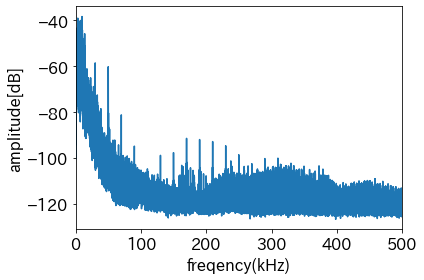

In [32]:
dt = 1/10**6
y = d[0]
N = len(y)
t = np.linspace(0, N*dt, N)

split_t_r = 0.1
overlap = 0.5
window_F = "hanning" 
y_label = "amplitude"
y_unit = "V"
output_FN = "haha"

fft_r = FFT_main(t, y, dt, split_t_r, overlap, window_F, output_FN, y_label, y_unit)

In [42]:
fft_r[1][-1]

8.326871887991455e-07

In [ ]:
list(fft)